In [2]:
import warnings
import numpy as np
import pandas as pd
import joblib
import seaborn as sns
from sklearn import preprocessing, model_selection, metrics
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [3]:
# Load the dataset
df=pd.read_csv("C:\\Users\\SOOQ ELASER\\Documents\\PLP\\Prompt BI\\StudentPerformanceFactors.csv")
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

# Exploratory Analysis

In [6]:
# Descriptive statistics for the dataframe `df`
# Numeric summary
print("Numeric summary:")
print(df.describe().T)


Numeric summary:
                    count       mean        std   min   25%   50%   75%    max
Hours_Studied      6607.0  19.975329   5.990594   1.0  16.0  20.0  24.0   44.0
Attendance         6607.0  79.977448  11.547475  60.0  70.0  80.0  90.0  100.0
Sleep_Hours        6607.0   7.029060   1.468120   4.0   6.0   7.0   8.0   10.0
Previous_Scores    6607.0  75.070531  14.399784  50.0  63.0  75.0  88.0  100.0
Tutoring_Sessions  6607.0   1.493719   1.230570   0.0   1.0   1.0   2.0    8.0
Physical_Activity  6607.0   2.967610   1.031231   0.0   2.0   3.0   4.0    6.0
Exam_Score         6607.0  67.235659   3.890456  55.0  65.0  67.0  69.0  101.0


In [7]:
# Categorical summary
print("\nCategorical summary (count / unique / top / freq):")
print(df.describe(include=['object']).T)


Categorical summary (count / unique / top / freq):
                           count unique          top  freq
Parental_Involvement        6607      3       Medium  3362
Access_to_Resources         6607      3       Medium  3319
Extracurricular_Activities  6607      2          Yes  3938
Motivation_Level            6607      3       Medium  3351
Internet_Access             6607      2          Yes  6108
Family_Income               6607      3          Low  2672
Teacher_Quality             6529      3       Medium  3925
School_Type                 6607      2       Public  4598
Peer_Influence              6607      3     Positive  2638
Learning_Disabilities       6607      2           No  5912
Parental_Education_Level    6517      3  High School  3223
Distance_from_Home          6540      3         Near  3884
Gender                      6607      2         Male  3814


In [8]:
# Unique values count
print("\nUnique values per column:")
print(df.nunique())



Unique values per column:
Hours_Studied                 41
Attendance                    41
Parental_Involvement           3
Access_to_Resources            3
Extracurricular_Activities     2
Sleep_Hours                    7
Previous_Scores               51
Motivation_Level               3
Internet_Access                2
Tutoring_Sessions              9
Family_Income                  3
Teacher_Quality                3
School_Type                    2
Peer_Influence                 3
Physical_Activity              7
Learning_Disabilities          2
Parental_Education_Level       3
Distance_from_Home             3
Gender                         2
Exam_Score                    45
dtype: int64


In [9]:
# Missing values
print("\nMissing values per column:")
print(df.isnull().sum())



Missing values per column:
Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


In [10]:
# Top 5 categories for each categorical column
print("\nTop categories per categorical column:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"\n{col} (top 5):")
    print(df[col].value_counts().head(5))


Top categories per categorical column:

Parental_Involvement (top 5):
Parental_Involvement
Medium    3362
High      1908
Low       1337
Name: count, dtype: int64

Access_to_Resources (top 5):
Access_to_Resources
Medium    3319
High      1975
Low       1313
Name: count, dtype: int64

Extracurricular_Activities (top 5):
Extracurricular_Activities
Yes    3938
No     2669
Name: count, dtype: int64

Motivation_Level (top 5):
Motivation_Level
Medium    3351
Low       1937
High      1319
Name: count, dtype: int64

Internet_Access (top 5):
Internet_Access
Yes    6108
No      499
Name: count, dtype: int64

Family_Income (top 5):
Family_Income
Low       2672
Medium    2666
High      1269
Name: count, dtype: int64

Teacher_Quality (top 5):
Teacher_Quality
Medium    3925
High      1947
Low        657
Name: count, dtype: int64

School_Type (top 5):
School_Type
Public     4598
Private    2009
Name: count, dtype: int64

Peer_Influence (top 5):
Peer_Influence
Positive    2638
Neutral     2592
Negativ

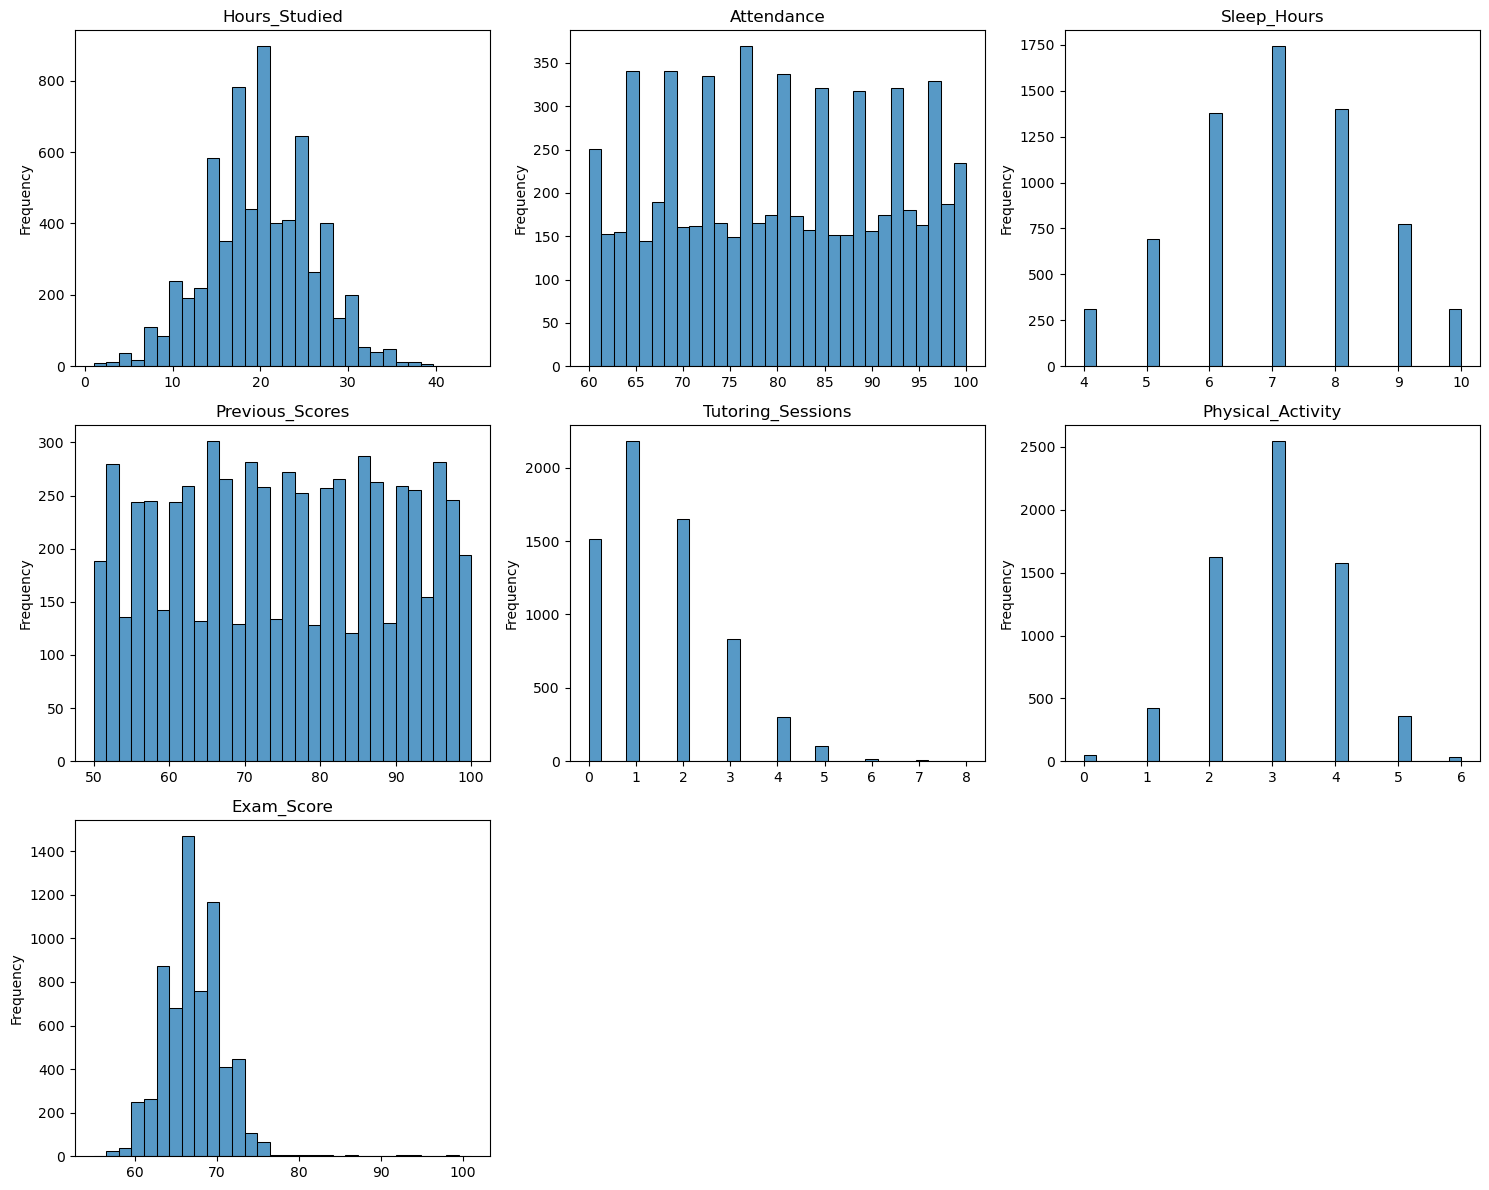

In [12]:
import math
import matplotlib.pyplot as plt


# select numeric columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# subplot grid
n = len(num_cols)
ncols = 3
nrows = math.ceil(n / ncols)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5 * ncols, 4 * nrows))
axes = axes.flatten()

# plot histograms
for ax, col in zip(axes, num_cols):
    sns.histplot(df[col].dropna(), bins=30, kde=False, ax=ax)
    ax.set_title(col)
    ax.set_xlabel('')
    ax.set_ylabel('Frequency')

# hide any unused axes
for ax in axes[n:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

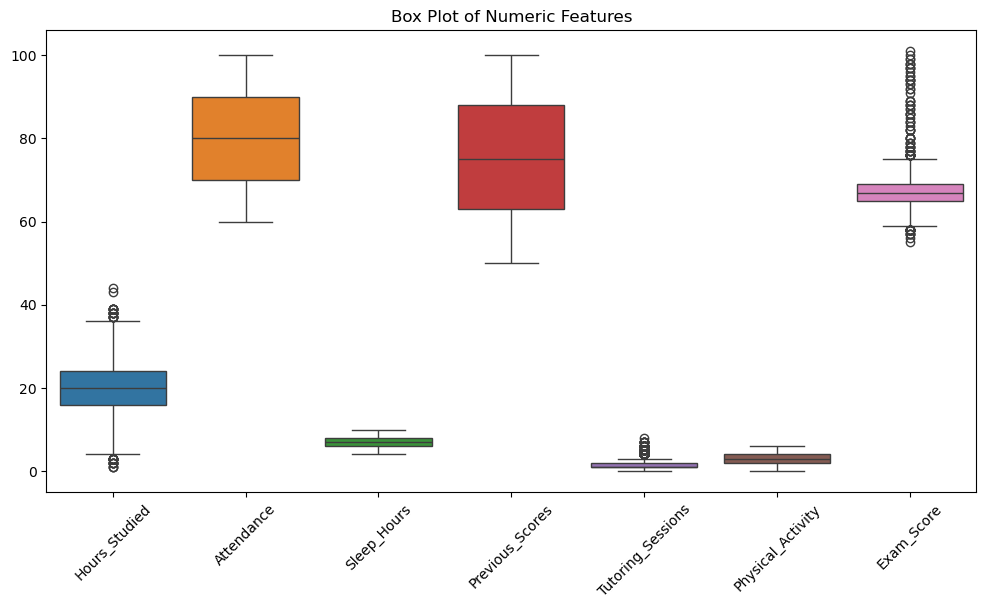

In [13]:
# Box plot for all numeric columns in df
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_cols])
plt.title("Box Plot of Numeric Features")
plt.xticks(rotation=45)
plt.show()

In [14]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

## Mapping columns to Categories

In [15]:
# Create a mapping of columns to categories
column_info = {
    "Hours_Studied": ["Academic Factors", "Numeric", "Feature"],
    "Attendance": ["Academic Factors", "Numeric", "Feature"],
    "Parental_Involvement": ["Family & Socioeconomic Factors", "Categorical", "Feature"],
    "Access_to_Resources": ["Family & Socioeconomic Factors", "Categorical", "Feature"],
    "Extracurricular_Activities": ["School Environment Factors", "Categorical", "Feature"],
    "Sleep_Hours": ["Personal & Behavioral Factors", "Numeric", "Feature"],
    "Previous_Scores": ["Academic Factors", "Numeric", "Feature"],
    "Motivation_Level": ["Personal & Behavioral Factors", "Categorical", "Feature"],
    "Internet_Access": ["Demographic Factors", "Categorical", "Feature"],
    "Tutoring_Sessions": ["Academic Factors", "Numeric", "Feature"],
    "Family_Income": ["Family & Socioeconomic Factors", "Categorical", "Feature"],
    "Teacher_Quality": ["Academic Factors", "Categorical", "Feature"],
    "School_Type": ["School Environment Factors", "Categorical", "Feature"],
    "Peer_Influence": ["School Environment Factors", "Categorical", "Feature"],
    "Physical_Activity": ["Personal & Behavioral Factors", "Numeric", "Feature"],
    "Learning_Disabilities": ["Personal & Behavioral Factors", "Categorical", "Feature"],
    "Parental_Education_Level": ["Family & Socioeconomic Factors", "Ordinal", "Feature"],
    "Distance_from_Home": ["School Environment Factors", "Categorical", "Feature"],
    "Gender": ["Demographic Factors", "Categorical", "Feature"],
    "Exam_Score": ["Outcome", "Numeric", "Target"]
}

# Convert to DataFrame
metadata = pd.DataFrame.from_dict(column_info, orient='index', columns=["Category", "Data_Type", "Role"])
metadata


,Category,Data_Type,Role
Hours_Studied,Academic Factors,Numeric,Feature
Attendance,Academic Factors,Numeric,Feature
Parental_Involvement,Family & Socioeconomic Factors,Categorical,Feature
Access_to_Resources,Family & Socioeconomic Factors,Categorical,Feature
Extracurricular_Activities,School Environment Factors,Categorical,Feature
Sleep_Hours,Personal & Behavioral Factors,Numeric,Feature
Previous_Scores,Academic Factors,Numeric,Feature
Motivation_Level,Personal & Behavioral Factors,Categorical,Feature
Internet_Access,Demographic Factors,Categorical,Feature
Tutoring_Sessions,Academic Factors,Numeric,Feature


In [16]:
metadata.to_csv("column_metadata.csv")



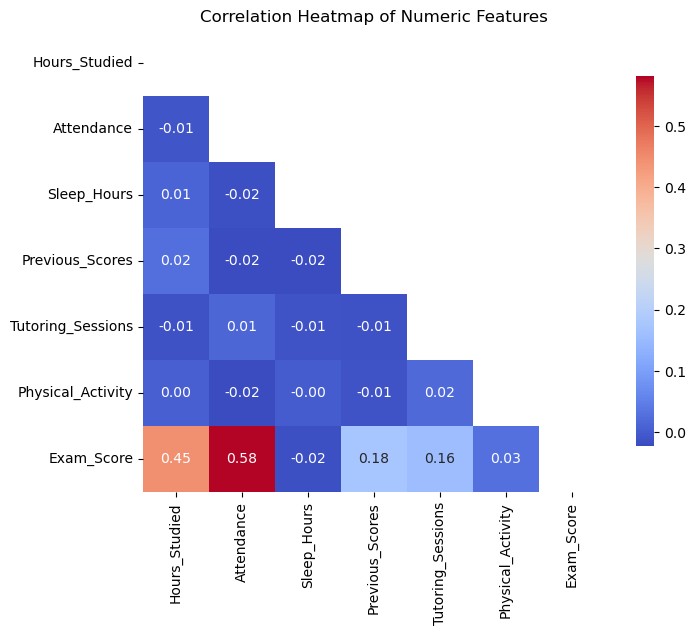

In [ ]:
# Correlation heatmap for numeric columns
corr = df[num_cols].corr()
plt.figure(figsize=(8, 6))
mask = np.triu(np.ones_like(corr, dtype=bool))  # mask upper triangle   
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

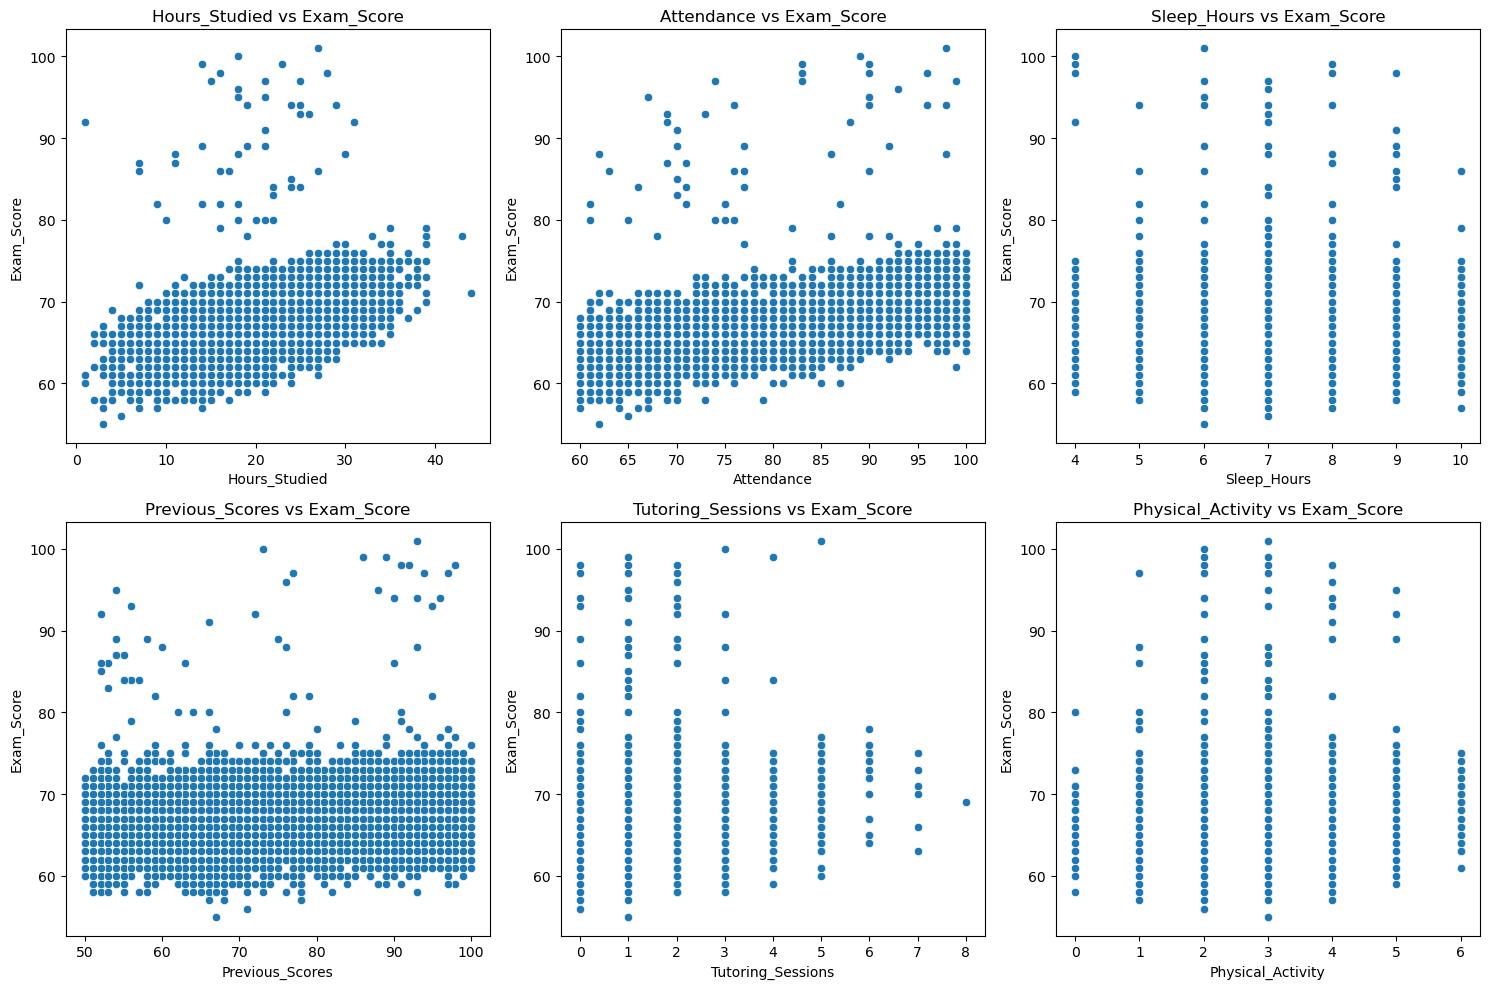

In [24]:
# Create scatter plots for each numeric column vs target variable
numeric_features = [col for col in num_cols if col != 'Exam_Score']
n_features = len(numeric_features)
n_rows = (n_features + 2) // 3  # Calculate number of rows needed
plt.figure(figsize=(15, 5 * n_rows))

for i, col in enumerate(numeric_features):
    plt.subplot(n_rows, 3, i+1)
    sns.scatterplot(data=df, x=col, y='Exam_Score')
    plt.title(f'{col} vs Exam_Score')

plt.tight_layout()
plt.show()

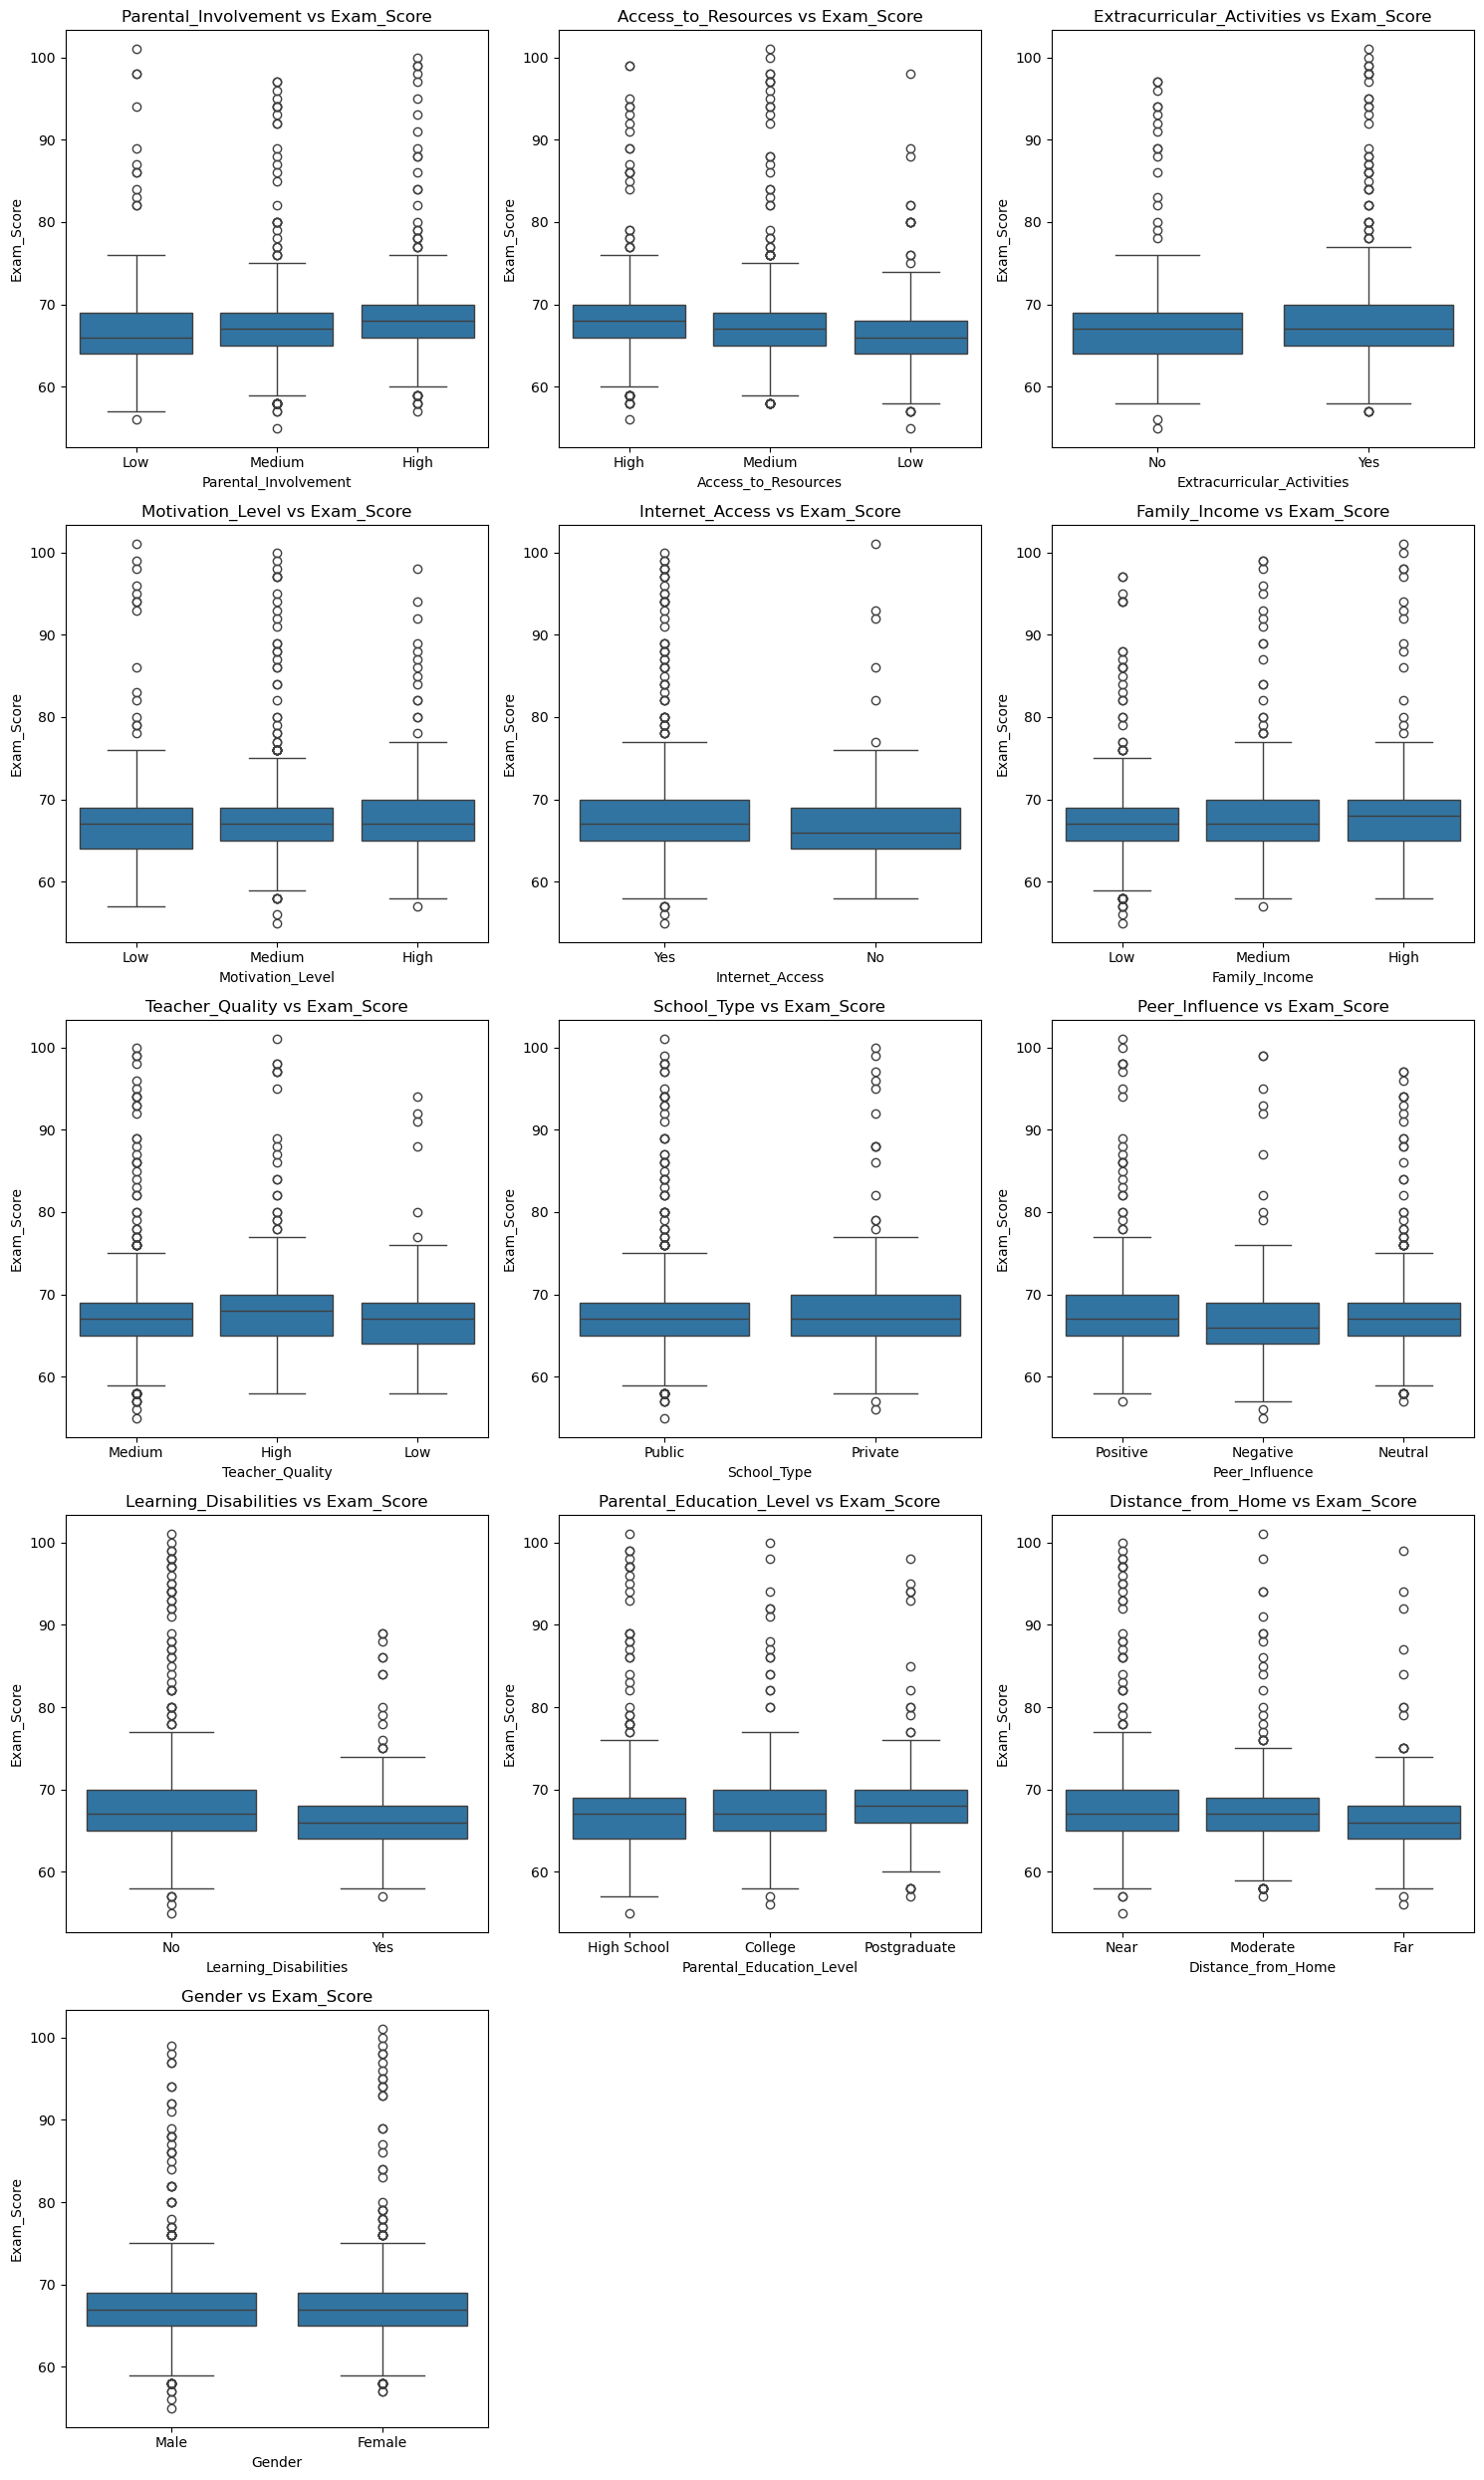

In [31]:
# categorial features vs target variable
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
n_categories = len(categorical_cols)
n_rows = (n_categories + 2) // 3  # Calculate number of rows needed
plt.figure(figsize=(15, 5 * n_rows))
for i, col in enumerate(categorical_cols):
    plt.subplot(n_rows, 3, i+1)
    sns.boxplot(data=df, x=col, y='Exam_Score')
    plt.title(f'{col} vs Exam_Score')
    plt.tight_layout()
plt.show()

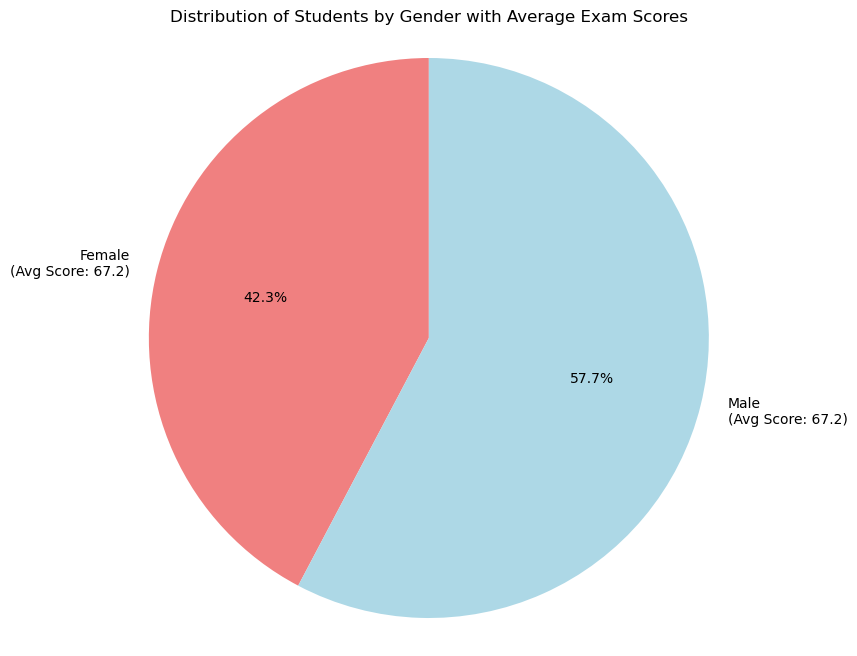

In [28]:
# Calculate mean exam score by gender and their percentage
gender_exam = df.groupby('Gender')['Exam_Score'].agg(['mean', 'count'])
gender_exam['percentage'] = gender_exam['count'] / gender_exam['count'].sum() * 100

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(gender_exam['percentage'], 
    labels=[f"{gender}\n(Avg Score: {score:.1f})" for gender, score in zip(gender_exam.index, gender_exam['mean'])],
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightcoral', 'lightblue'])

plt.title('Distribution of Students by Gender with Average Exam Scores')
plt.axis('equal')
plt.show()

# Features Category Analysis

### Analysis of Academic Factors vs Exam Score

Academic Factors vs Exam_Score:
                          type  pearson_corr  abs_corr  mean_range  \
feature                                                              
Hours_Studied          Numeric      0.445455  0.445455         NaN   
Attendance             Numeric      0.581072  0.581072         NaN   
Previous_Scores        Numeric      0.175079  0.175079         NaN   
Tutoring_Sessions      Numeric      0.156525  0.156525         NaN   
Teacher_Quality    Categorical           NaN       NaN    0.923514   

                   effect_size  n_levels  
feature                                   
Hours_Studied              NaN       NaN  
Attendance                 NaN       NaN  
Previous_Scores            NaN       NaN  
Tutoring_Sessions          NaN       NaN  
Teacher_Quality       0.237379       3.0  


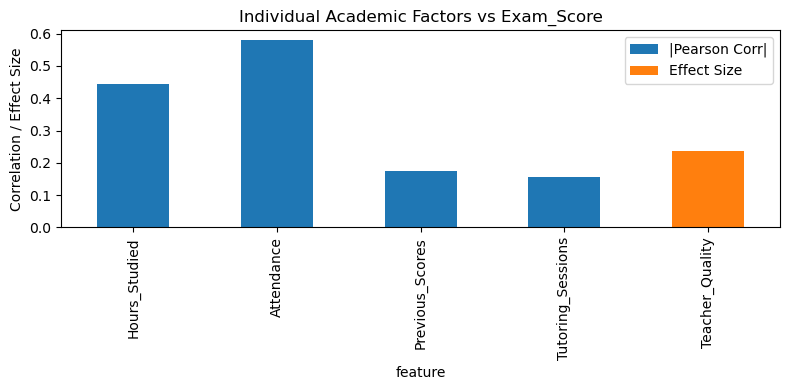

In [29]:
# Analyze individual Academic Factors vs Exam_Score

academic_features = [f for f in metadata.index if metadata.loc[f, "Category"] == "Academic Factors" and f != "Exam_Score"]
results = []

for feat in academic_features:
    dtype = metadata.loc[feat, "Data_Type"]
    if dtype == "Numeric":
        # Pearson correlation
        corr_val = df[[feat, "Exam_Score"]].corr().iloc[0, 1]
        results.append({
            "feature": feat,
            "type": "Numeric",
            "pearson_corr": corr_val,
            "abs_corr": abs(corr_val)
        })
    else:
        # Categorical: effect size (range of means normalized by Exam_Score std)
        grp = df.dropna(subset=[feat]).groupby(feat)["Exam_Score"].agg(["mean", "count"])
        if grp.shape[0] <= 1:
            effect = 0.0
        else:
            effect = (grp["mean"].max() - grp["mean"].min()) / (exam_std if exam_std > 0 else 1)
        results.append({
            "feature": feat,
            "type": "Categorical",
            "mean_range": (grp["mean"].max() - grp["mean"].min()) if not grp.empty else 0.0,
            "effect_size": effect,
            "n_levels": grp.shape[0]
        })

academic_analysis = pd.DataFrame(results).set_index("feature")
print("Academic Factors vs Exam_Score:")
print(academic_analysis)

# Optional: quick bar plot of absolute correlation/effect size
plt.figure(figsize=(8, 4))
if "abs_corr" in academic_analysis.columns:
    academic_analysis["abs_corr"].plot(kind="bar", color="C0", label="|Pearson Corr|")
if "effect_size" in academic_analysis.columns:
    academic_analysis["effect_size"].plot(kind="bar", color="C1", label="Effect Size")
plt.ylabel("Correlation / Effect Size")
plt.title("Individual Academic Factors vs Exam_Score")
plt.legend()
plt.tight_layout()
plt.show()

### Analysis of Family & Socioeconomic Factors

Family & Socioeconomic Factors vs Exam_Score:
                                 type  mean_range  effect_size  n_levels
feature                                                                 
Parental_Involvement      Categorical    1.734503     0.445835         3
Access_to_Resources       Categorical    1.888801     0.485496         3
Family_Income             Categorical    0.993967     0.255489         3
Parental_Education_Level      Ordinal    1.077304     0.276909         3


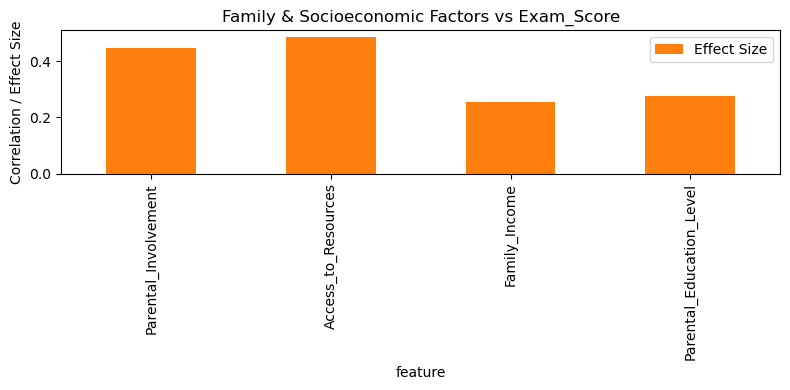

In [30]:
# Analysis of Family & Socioeconomic Factors

family_socio_feats = [f for f in metadata.index if metadata.loc[f, "Category"] == "Family & Socioeconomic Factors"]

results = []
for feat in family_socio_feats:
    dtype = metadata.loc[feat, "Data_Type"]
    if dtype == "Numeric":
        corr_val = df[[feat, "Exam_Score"]].corr().iloc[0, 1]
        results.append({
            "feature": feat,
            "type": "Numeric",
            "pearson_corr": corr_val,
            "abs_corr": abs(corr_val)
        })
    else:
        grp = df.dropna(subset=[feat]).groupby(feat)["Exam_Score"].agg(["mean", "count"])
        if grp.shape[0] <= 1:
            effect = 0.0
        else:
            effect = (grp["mean"].max() - grp["mean"].min()) / (exam_std if exam_std > 0 else 1)
        results.append({
            "feature": feat,
            "type": dtype,
            "mean_range": (grp["mean"].max() - grp["mean"].min()) if not grp.empty else 0.0,
            "effect_size": effect,
            "n_levels": grp.shape[0]
        })

family_socio_analysis = pd.DataFrame(results).set_index("feature")
print("Family & Socioeconomic Factors vs Exam_Score:")
print(family_socio_analysis)

# Optional: bar plot of effect sizes
plt.figure(figsize=(8, 4))
if "abs_corr" in family_socio_analysis.columns:
    family_socio_analysis["abs_corr"].plot(kind="bar", color="C0", label="|Pearson Corr|")
if "effect_size" in family_socio_analysis.columns:
    family_socio_analysis["effect_size"].plot(kind="bar", color="C1", label="Effect Size")
plt.ylabel("Correlation / Effect Size")
plt.title("Family & Socioeconomic Factors vs Exam_Score")
plt.legend()
plt.tight_layout()
plt.show()

### Analysis of Personal & Behavioral Factors

In [ ]:
#

Personal & Behavioral Factors vs Exam_Score:
                              type  pearson_corr  abs_corr  mean_range  \
feature                                                                  
Sleep_Hours                Numeric     -0.017022  0.017022         NaN   
Motivation_Level       Categorical           NaN       NaN    0.952127   
Physical_Activity          Numeric      0.027824  0.027824         NaN   
Learning_Disabilities  Categorical           NaN       NaN    1.078617   

                       effect_size  n_levels  
feature                                       
Sleep_Hours                    NaN       NaN  
Motivation_Level          0.244734       3.0  
Physical_Activity              NaN       NaN  
Learning_Disabilities     0.277247       2.0  


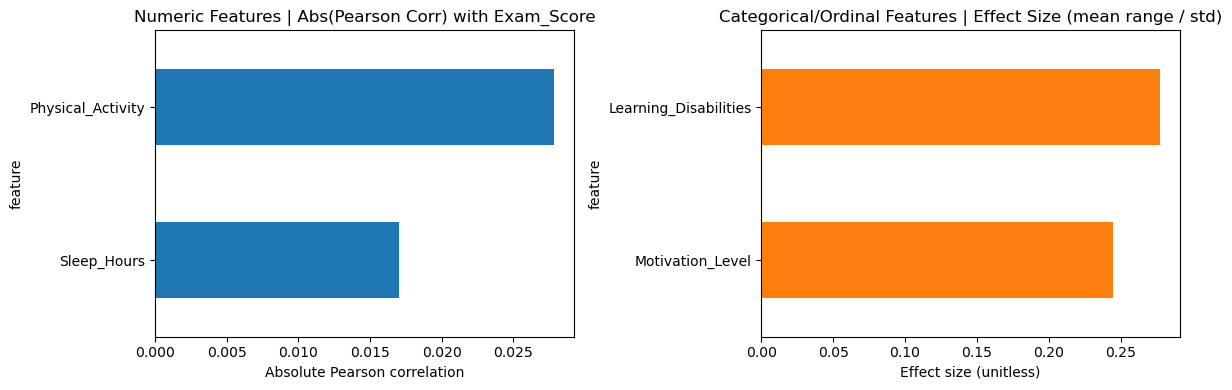

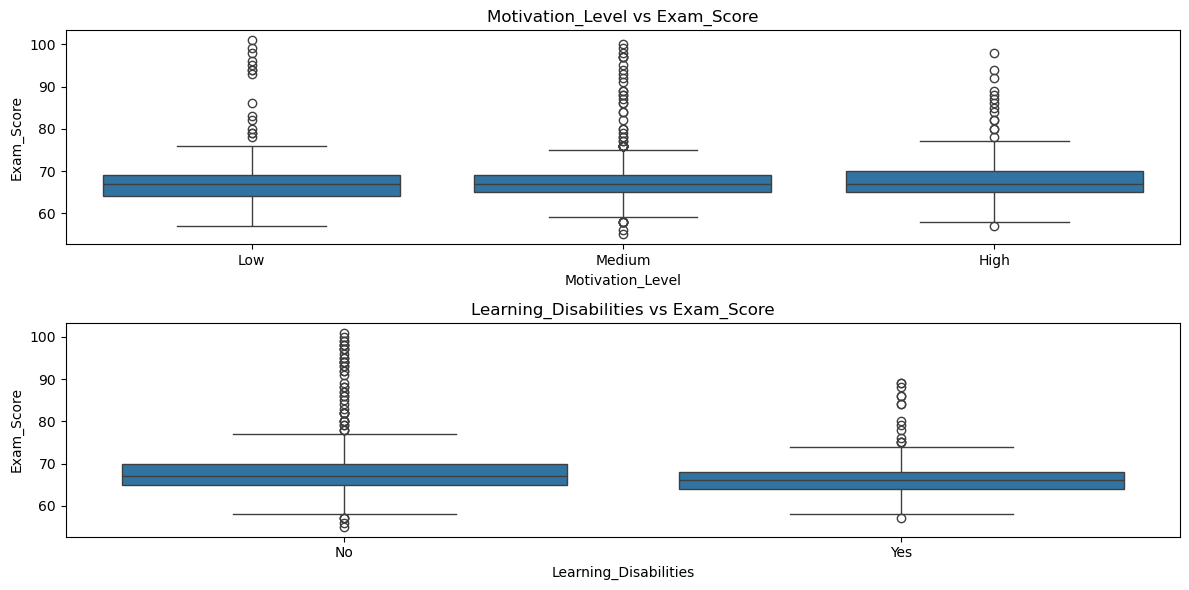

In [32]:
# Personal & Behavioral Factors vs Exam_Score analysis
personal_feats = [
    f for f in metadata.index
    if metadata.loc[f, "Category"] == "Personal & Behavioral Factors" and f != "Exam_Score"
]

results = []
exam_std = globals().get("exam_std", df["Exam_Score"].std())

for feat in personal_feats:
    dtype = metadata.loc[feat, "Data_Type"]
    if dtype == "Numeric":
        corr_val = df[[feat, "Exam_Score"]].corr().iloc[0, 1]
        results.append({
            "feature": feat,
            "type": "Numeric",
            "pearson_corr": corr_val,
            "abs_corr": abs(corr_val)
        })
    else:
        grp = df.dropna(subset=[feat]).groupby(feat)["Exam_Score"].agg(["mean", "count"])
        if grp.shape[0] <= 1:
            effect = 0.0
            mean_range = 0.0
        else:
            mean_range = grp["mean"].max() - grp["mean"].min()
            effect = mean_range / (exam_std if exam_std > 0 else 1.0)
        results.append({
            "feature": feat,
            "type": dtype,
            "mean_range": mean_range,
            "effect_size": effect,
            "n_levels": grp.shape[0]
        })

personal_analysis = pd.DataFrame(results).set_index("feature")
print("Personal & Behavioral Factors vs Exam_Score:")
print(personal_analysis)

# Quick visual summary
num = personal_analysis[personal_analysis["type"] == "Numeric"]
cat = personal_analysis[personal_analysis["type"] != "Numeric"]

ncols = 2
fig, axes = plt.subplots(1, ncols, figsize=(12, 4))

# Numeric: absolute Pearson correlations
if not num.empty:
    num["abs_corr"].sort_values().plot(kind="barh", ax=axes[0], color="C0")
    axes[0].set_title("Numeric Features | Abs(Pearson Corr) with Exam_Score")
    axes[0].set_xlabel("Absolute Pearson correlation")
else:
    axes[0].text(0.5, 0.5, "No numeric personal features", ha="center", va="center")
    axes[0].axis("off")

# Categorical: effect sizes
if not cat.empty:
    cat["effect_size"].sort_values().plot(kind="barh", ax=axes[1], color="C1")
    axes[1].set_title("Categorical/Ordinal Features | Effect Size (mean range / std)")
    axes[1].set_xlabel("Effect size (unitless)")
else:
    axes[1].text(0.5, 0.5, "No categorical personal features", ha="center", va="center")
    axes[1].axis("off")

plt.tight_layout()
plt.show()

# Optional: boxplots for categorical personal features vs Exam_Score
if not cat.empty:
    plt.figure(figsize=(12, 4 + 1*len(cat)))
    for i, feat in enumerate(cat.index):
        plt.subplot(len(cat), 1, i+1)
        sns.boxplot(data=df, x=feat, y="Exam_Score")
        plt.title(f"{feat} vs Exam_Score")
    plt.tight_layout()
    plt.show()

### Analysis of Demographic features vs Exam score

Demographic Factors vs Exam_Score:
                        type  mean_range  effect_size  n_levels  \
feature                                                           
Internet_Access  Categorical    0.757824     0.194791         2   
Gender           Categorical    0.016004     0.004114         2   

                 model_importance  
feature                            
Internet_Access          0.006471  
Gender                   0.007345  


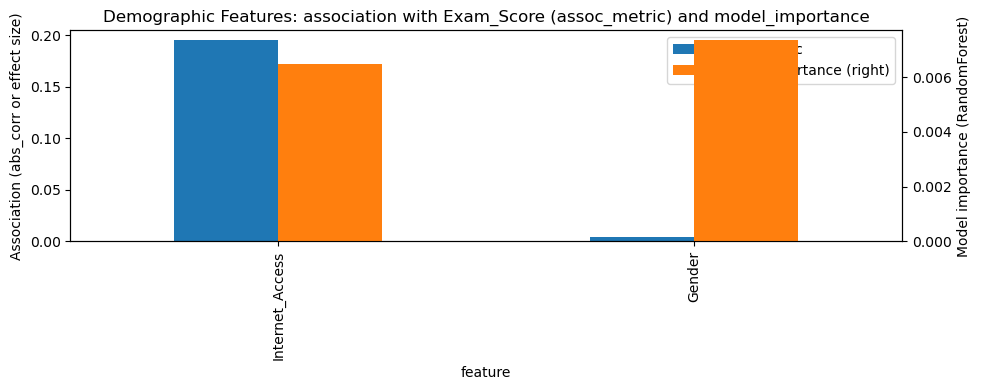

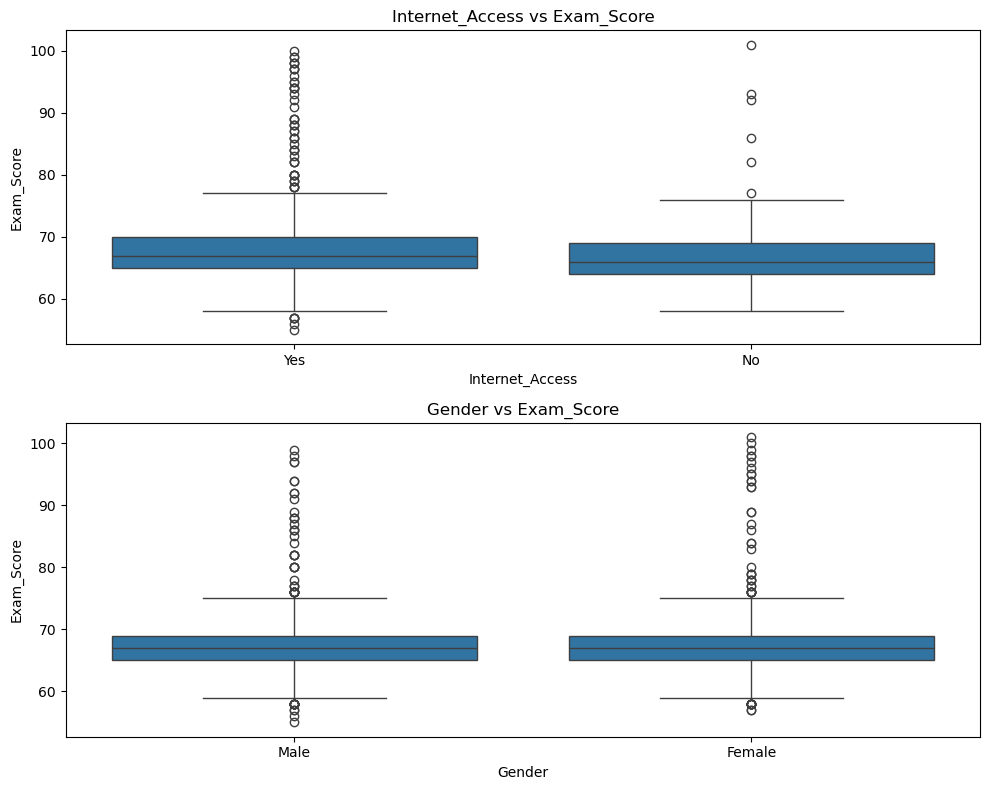

In [34]:
# Demographic features vs Exam_Score analysis
demographic_feats = [
    f for f in metadata.index
    if metadata.loc[f, "Category"] == "Demographic Factors" and f != "Exam_Score"
]

results = []
exam_std = globals().get("exam_std", df["Exam_Score"].std())

for feat in demographic_feats:
    dtype = metadata.loc[feat, "Data_Type"]
    if dtype == "Numeric":
        corr_val = df[[feat, "Exam_Score"]].corr().iloc[0, 1]
        results.append({
            "feature": feat,
            "type": "Numeric",
            "pearson_corr": corr_val,
            "abs_corr": abs(corr_val)
        })
    else:
        grp = df.dropna(subset=[feat]).groupby(feat)["Exam_Score"].agg(["mean", "count"])
        if grp.shape[0] <= 1:
            mean_range = 0.0
            effect = 0.0
        else:
            mean_range = grp["mean"].max() - grp["mean"].min()
            effect = mean_range / (exam_std if exam_std > 0 else 1.0)
        results.append({
            "feature": feat,
            "type": dtype,
            "mean_range": mean_range,
            "effect_size": effect,
            "n_levels": grp.shape[0]
        })

demographic_analysis = pd.DataFrame(results).set_index("feature")

# Add model importance (from RandomForest aggregate) if available
if "fi_feature_df" in globals():
    demographic_analysis["model_importance"] = demographic_analysis.index.map(lambda x: float(fi_feature_df.get(x, 0.0)))
else:
    demographic_analysis["model_importance"] = 0.0

print("Demographic Factors vs Exam_Score:")
print(demographic_analysis)

# Unified association metric for plotting: use abs_corr for numeric, effect_size for categorical
demographic_analysis["assoc_metric"] = demographic_analysis.apply(
    lambda r: r["abs_corr"] if r["type"] == "Numeric" and pd.notna(r.get("abs_corr")) else r.get("effect_size", 0.0),
    axis=1
)

# Bar plot: association metric vs model importance
# DataFrame.plot returns a single Axes for this case; do not subscript it.
ax = demographic_analysis[["assoc_metric", "model_importance"]].plot(
    kind="bar", secondary_y="model_importance", figsize=(10, 4)
)
ax.set_title("Demographic Features: association with Exam_Score (assoc_metric) and model_importance")
# Primary y-axis label
ax.set_ylabel("Association (abs_corr or effect size)")
# Secondary y-axis label (pandas stores it as ax.right_ax)
if hasattr(ax, "right_ax"):
    ax.right_ax.set_ylabel("Model importance (RandomForest)")
else:
    ax_secondary = ax.twinx()
    ax_secondary.set_ylabel("Model importance (RandomForest)")

plt.tight_layout()
plt.show()

# Boxplots for categorical demographic features
cat_demogs = [f for f in demographic_feats if metadata.loc[f, "Data_Type"] != "Numeric"]
if cat_demogs:
    plt.figure(figsize=(10, 4 * len(cat_demogs)))
    for i, feat in enumerate(cat_demogs, 1):
        plt.subplot(len(cat_demogs), 1, i)
        sns.boxplot(data=df, x=feat, y="Exam_Score")
        plt.title(f"{feat} vs Exam_Score")
    plt.tight_layout()
    plt.show()
else:
    print("No categorical demographic features to plot.")

#### Categorical acorrelation analysis

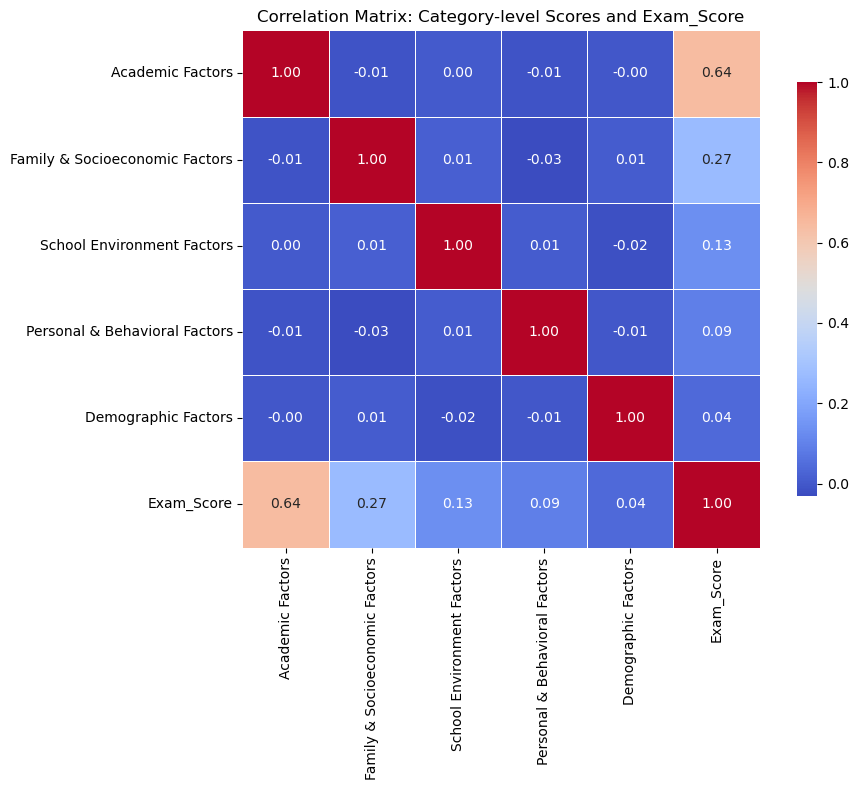

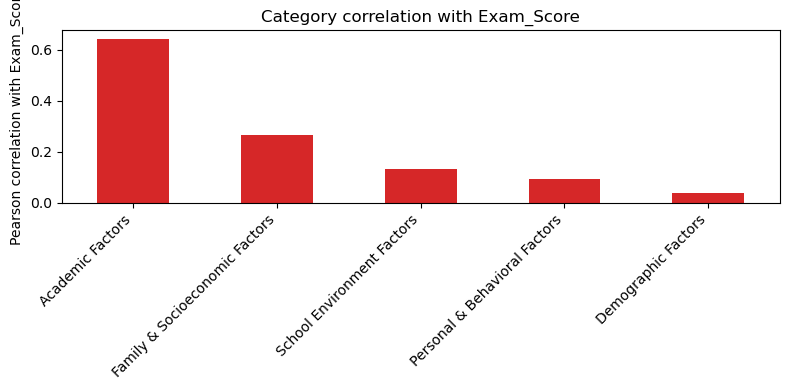

In [20]:
# Build per-sample category scores (numeric features z-scored; categorical/ordinal target-encoded then z-scored)
cats = metadata["Category"].unique()
category_scores = pd.DataFrame(index=df.index)

for cat in cats:
    # features belonging to this category (skip the target if present)
    feats = [f for f in metadata[metadata["Category"] == cat].index.tolist() if f in df.columns and f != "Exam_Score"]
    if not feats:
        continue

    encoded_cols = []
    for f in feats:
        dtype = metadata.loc[f, "Data_Type"]
        if dtype == "Numeric":
            s = df[f].astype(float)
        else:
            # target-encode categorical/ordinal features by replacing each level with mean Exam_Score for that level
            # fall back to global mean where mapping is not available (e.g., unseen / NaN)
            level_means = df.groupby(f)["Exam_Score"].mean()
            s = df[f].map(level_means).fillna(df["Exam_Score"].mean())
        # z-score (stable)
        s_z = (s - s.mean()) / (s.std() if s.std() > 0 else 1.0)
        encoded_cols.append(s_z)

    # average the encoded feature columns to get a single category score per sample
    category_scores[cat] = pd.concat(encoded_cols, axis=1).mean(axis=1)

# Include Exam_Score and compute correlation matrix
cat_corr_df = category_scores.join(df["Exam_Score"])
corr_matrix = cat_corr_df.corr()

# Heatmap of correlations (categories + Exam_Score)
plt.figure(figsize=(10, 8))
mask = np.zeros_like(corr_matrix, dtype=bool)
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", square=True,
            cbar_kws={"shrink": .8}, linewidths=.5)
plt.title("Correlation Matrix: Category-level Scores and Exam_Score")
plt.tight_layout()
plt.show()

# Bar plot: correlation of each category with Exam_Score
cat_vs_exam = corr_matrix["Exam_Score"].drop("Exam_Score").sort_values(ascending=False)
plt.figure(figsize=(8, 4))
cat_vs_exam.plot(kind="bar", color="C3")
plt.ylabel("Pearson correlation with Exam_Score")
plt.title("Category correlation with Exam_Score")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Machine Learning Modeling


Category contribution summary (sorted by model importance):
                                n_features  numeric_metric_mean_abs_corr  \
Category                                                                   
Academic Factors                         5                      0.339533   
Family & Socioeconomic Factors           4                      0.000000   
Personal & Behavioral Factors            4                      0.022423   
School Environment Factors               4                      0.000000   
Demographic Factors                      2                      0.000000   
Outcome                                  1                      0.000000   

                                categorical_metric_mean_effect_size  \
Category                                                              
Academic Factors                                           0.237379   
Family & Socioeconomic Factors                             0.365932   
Personal & Behavioral Factors                 

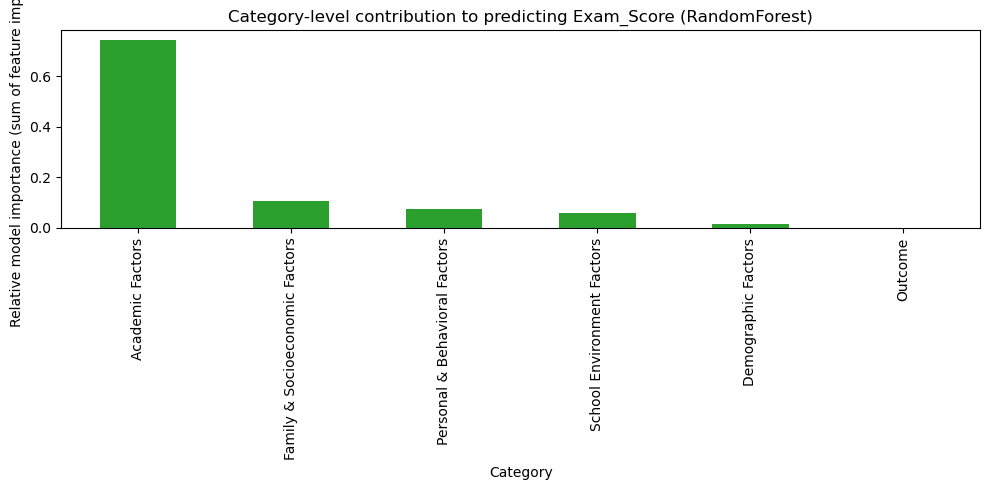

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Analyze contributions of metadata Categories to Exam_Score (correlation, categorical effect size, and model importance)


# 1) Numeric correlations with Exam_Score
numeric_features = [c for c in num_cols if c != "Exam_Score"]
corr_series = df[numeric_features + ["Exam_Score"]].corr()["Exam_Score"].drop("Exam_Score")
numeric_summary = pd.DataFrame({
    "feature": corr_series.index,
    "pearson_corr": corr_series.values,
    "abs_corr": corr_series.abs().values
}).set_index("feature")

# 2) Categorical effect sizes (range of category means normalized by target std)
cat_features = metadata[metadata["Data_Type"].isin(["Categorical", "Ordinal"])].index.tolist()
cat_features = [f for f in cat_features if f != "Exam_Score"]

exam_std = df["Exam_Score"].std()
cat_metrics = []
for f in cat_features:
    grp = df.dropna(subset=[f]).groupby(f)["Exam_Score"].agg(["mean", "count"])
    if grp.shape[0] <= 1:
        effect = 0.0
    else:
        effect = (grp["mean"].max() - grp["mean"].min()) / (exam_std if exam_std > 0 else 1)
    cat_metrics.append({"feature": f, "mean_range": (grp["mean"].max() - grp["mean"].min()) if not grp.empty else 0.0,
                        "effect_size": effect, "n_levels": grp.shape[0]})
cat_summary = pd.DataFrame(cat_metrics).set_index("feature")

# 3) Model-based feature importances (RandomForestRegressor on all features with one-hot for categoricals)
X = pd.get_dummies(df.drop(columns=["Exam_Score"]), dummy_na=False)
y = df["Exam_Score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
fi = pd.Series(rf.feature_importances_, index=X.columns)

# Map one-hot columns back to original features by prefix matching
feature_importance_by_feature = {}
original_features = list(metadata.index.drop("Exam_Score"))
for feat in original_features:
    # match exact column name (numeric) or startswith(feature + "_") for dummies
    matched_cols = [c for c in fi.index if c == feat or c.startswith(feat + "_")]
    feature_importance_by_feature[feat] = fi.loc[matched_cols].sum() if matched_cols else 0.0
fi_feature_df = pd.Series(feature_importance_by_feature).rename("model_importance")

# 4) Aggregate metrics by metadata Category
meta = metadata.copy()
meta["feature"] = meta.index
meta = meta.reset_index(drop=True)

agg_rows = []
for category, group in meta.groupby("Category"):
    feats = group["feature"].tolist()
    # numeric metric: mean absolute correlation for numeric features in this category
    numeric_feats = [f for f in feats if f in numeric_summary.index]
    numeric_metric = numeric_summary.loc[numeric_feats, "abs_corr"].mean() if numeric_feats else 0.0
    # categorical metric: mean effect_size for categorical/ordinal features in this category
    cat_feats = [f for f in feats if f in cat_summary.index]
    categorical_metric = cat_summary.loc[cat_feats, "effect_size"].mean() if cat_feats else 0.0
    # model metric: sum of model importances for features in this category
    model_metric = fi_feature_df.loc[[f for f in feats if f in fi_feature_df.index]].sum()
    agg_rows.append({
        "Category": category,
        "n_features": len(feats),
        "numeric_metric_mean_abs_corr": numeric_metric,
        "categorical_metric_mean_effect_size": categorical_metric,
        "model_importance_sum": model_metric
    })

category_summary = pd.DataFrame(agg_rows).set_index("Category")
# normalize model importance to sum to 1 for comparability
if category_summary["model_importance_sum"].sum() > 0:
    category_summary["model_importance_rel"] = category_summary["model_importance_sum"] / category_summary["model_importance_sum"].sum()
else:
    category_summary["model_importance_rel"] = 0.0

# 5) Present concise results: sort by model_importance_rel and show key metrics
category_summary = category_summary.sort_values("model_importance_rel", ascending=False)
print("\nCategory contribution summary (sorted by model importance):")
print(category_summary[["n_features", "numeric_metric_mean_abs_corr", "categorical_metric_mean_effect_size", "model_importance_rel"]])

# 6) Optional quick bar plot for visual comparison
plt.figure(figsize=(10, 5))
category_summary["model_importance_rel"].plot(kind="bar", color="C2")
plt.ylabel("Relative model importance (sum of feature importances)")
plt.title("Category-level contribution to predicting Exam_Score (RandomForest)")
plt.tight_layout()
plt.show()

In [35]:
# Model evaluation and performance (uses existing rf, X_test, y_test, X_train, y_train, fi_feature_df / fi)

# Predictions
y_pred = rf.predict(X_test)

# Regression metrics
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = metrics.mean_absolute_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
explained_var = metrics.explained_variance_score(y_test, y_pred)

print("RandomForestRegressor performance on test set:")
print(f"  RMSE:            {rmse:.3f}")
print(f"  MSE:             {mse:.3f}")
print(f"  MAE:             {mae:.3f}")
print(f"  R^2:             {r2:.3f}")
print(f"  Explained var:   {explained_var:.3f}")

RandomForestRegressor performance on test set:
  RMSE:            2.081
  MSE:             4.333
  MAE:             1.089
  R^2:             0.682
  Explained var:   0.684



Train R^2: 0.945    Test R^2: 0.682


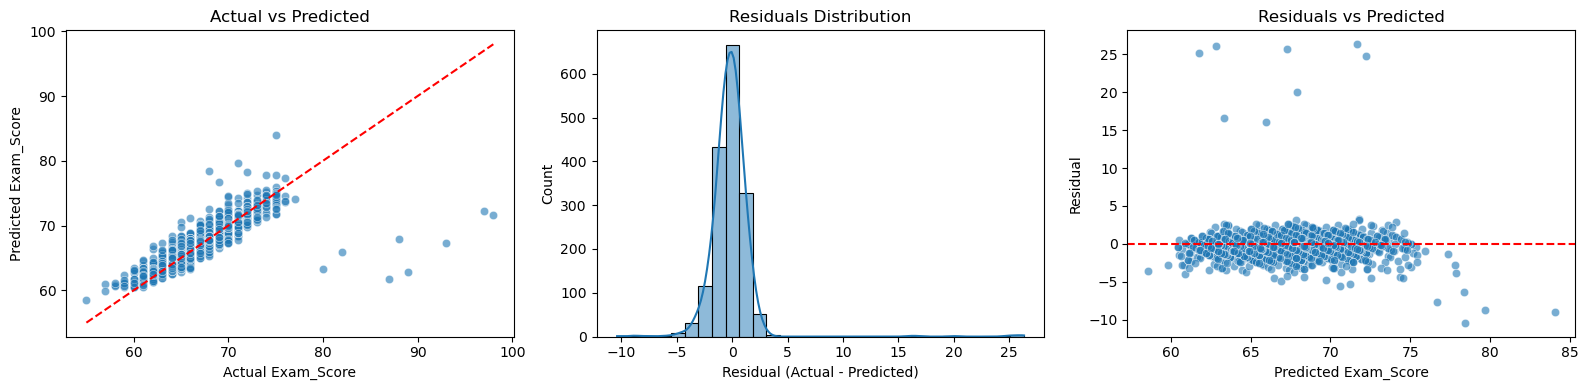

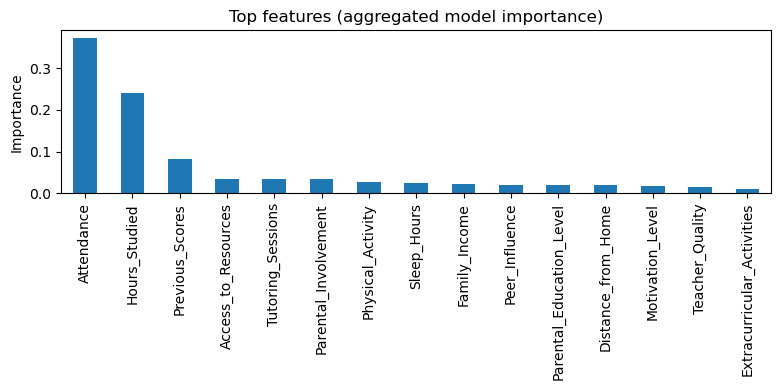

In [36]:
# Optional: training set score for overfitting check
train_r2 = rf.score(X_train, y_train)
test_r2  = r2
print(f"\nTrain R^2: {train_r2:.3f}    Test R^2: {test_r2:.3f}")

# Residuals
residuals = y_test - y_pred

# Plots: Actual vs Predicted, Residuals distribution, Residuals vs Predicted
plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
minv = min(y_test.min(), y_pred.min())
maxv = max(y_test.max(), y_pred.max())
plt.plot([minv, maxv], [minv, maxv], color="red", linestyle="--")
plt.xlabel("Actual Exam_Score")
plt.ylabel("Predicted Exam_Score")
plt.title("Actual vs Predicted")

plt.subplot(1, 3, 2)
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel("Residual (Actual - Predicted)")
plt.title("Residuals Distribution")

plt.subplot(1, 3, 3)
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Exam_Score")
plt.ylabel("Residual")
plt.title("Residuals vs Predicted")

plt.tight_layout()
plt.show()

# Feature importances (aggregated by original feature if available)
if "fi_feature_df" in globals():
    top_feats = fi_feature_df.sort_values(ascending=False).head(15)
    plt.figure(figsize=(8, 4))
    top_feats.plot(kind="bar")
    plt.title("Top features (aggregated model importance)")
    plt.ylabel("Importance")
    plt.tight_layout()
    plt.show()
else:
    # fallback to fi (one-hot importances)
    if "fi" in globals():
        top_feats = fi.sort_values(ascending=False).head(15)
        plt.figure(figsize=(10, 4))
        top_feats.plot(kind="bar")
        plt.title("Top one-hot features (model importance)")
        plt.ylabel("Importance")
        plt.tight_layout()
        plt.show()

In [37]:
## training the final model on the entire dataset for deployment
final_rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
final_X = pd.get_dummies(df.drop(columns=["Exam_Score"]), dummy_na=False)
final_y = df["Exam_Score"]
final_rf.fit(final_X, final_y)
joblib.dump(final_rf, "final_random_forest_model.pkl")
joblib.dump(final_X.columns.tolist(), "final_model_feature_columns.pkl")


['final_model_feature_columns.pkl']

In [40]:
# perfomance of the final model on the entire dataset
final_y_pred = final_rf.predict(final_X)
final_mse = metrics.mean_squared_error(final_y, final_y_pred)
final_rmse = np.sqrt(final_mse)
final_mae = metrics.mean_absolute_error(final_y, final_y_pred)
final_r2 = metrics.r2_score(final_y, final_y_pred)

print(f"Final model performance on entire dataset: RMSE = {final_rmse:.3f}")
print(f"Final model performance on entire dataset: MSE = {final_mse:.3f}")
print(f"Final model performance on entire dataset: MAE = {final_mae:.3f}")
print(f"Final model performance on entire dataset: R^2 = {final_r2:.3f}")
print("Model and feature columns saved for deployment.") 


Final model performance on entire dataset: RMSE = 0.895
Final model performance on entire dataset: MSE = 0.801
Final model performance on entire dataset: MAE = 0.423
Final model performance on entire dataset: R^2 = 0.947
Model and feature columns saved for deployment.


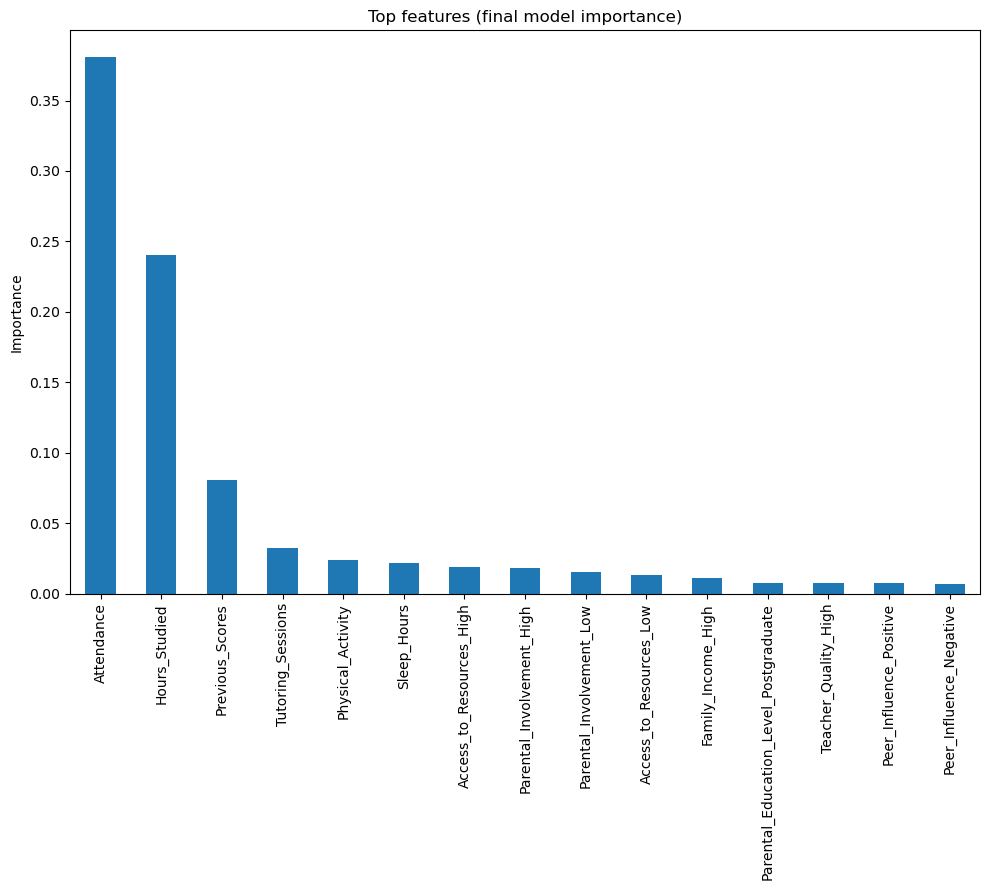

In [43]:
# feature importance of the final model
final_fi = pd.Series(final_rf.feature_importances_, index=final_X.columns)
top_final_feats = final_fi.sort_values(ascending=False).head(15)
plt.figure(figsize=(10, 9))
top_final_feats.plot(kind="bar")
plt.title("Top features (final model importance)")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()